### --> Data loading and Visualization:

In [1]:
# Import the libraries needed for the project:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the fetilizer dataset:

fertilizer = pd.read_csv("Fertilizer Prediction.csv")

In [6]:
# Fetch the first and last 5 dataframes of the 'crop' dataset:

fertilizer.head()              

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
fertilizer.tail()         

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [8]:
# Check the shape of the dataset:

fertilizer.shape  

(99, 9)

In [9]:
# Check the basic info of the dataset:

fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [10]:
# Check the missing values in the dataset:

fertilizer.isnull().sum()                   # --> It will return a dataframe having the 'columns of the dataset' as index and the the 'sum of null values' present in each column as values against the indices.

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
# Check the duplicated values in the dataset:

fertilizer.duplicated().sum()

0

In [12]:
# Check the basic statistics of the dataset:

fertilizer.describe()                      # --> It will return a dataframe with the same columns as in the dataset and parameters such as count, mean min, etc as values in the columns.

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [13]:
# Selecting only the numerical columns: 

features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


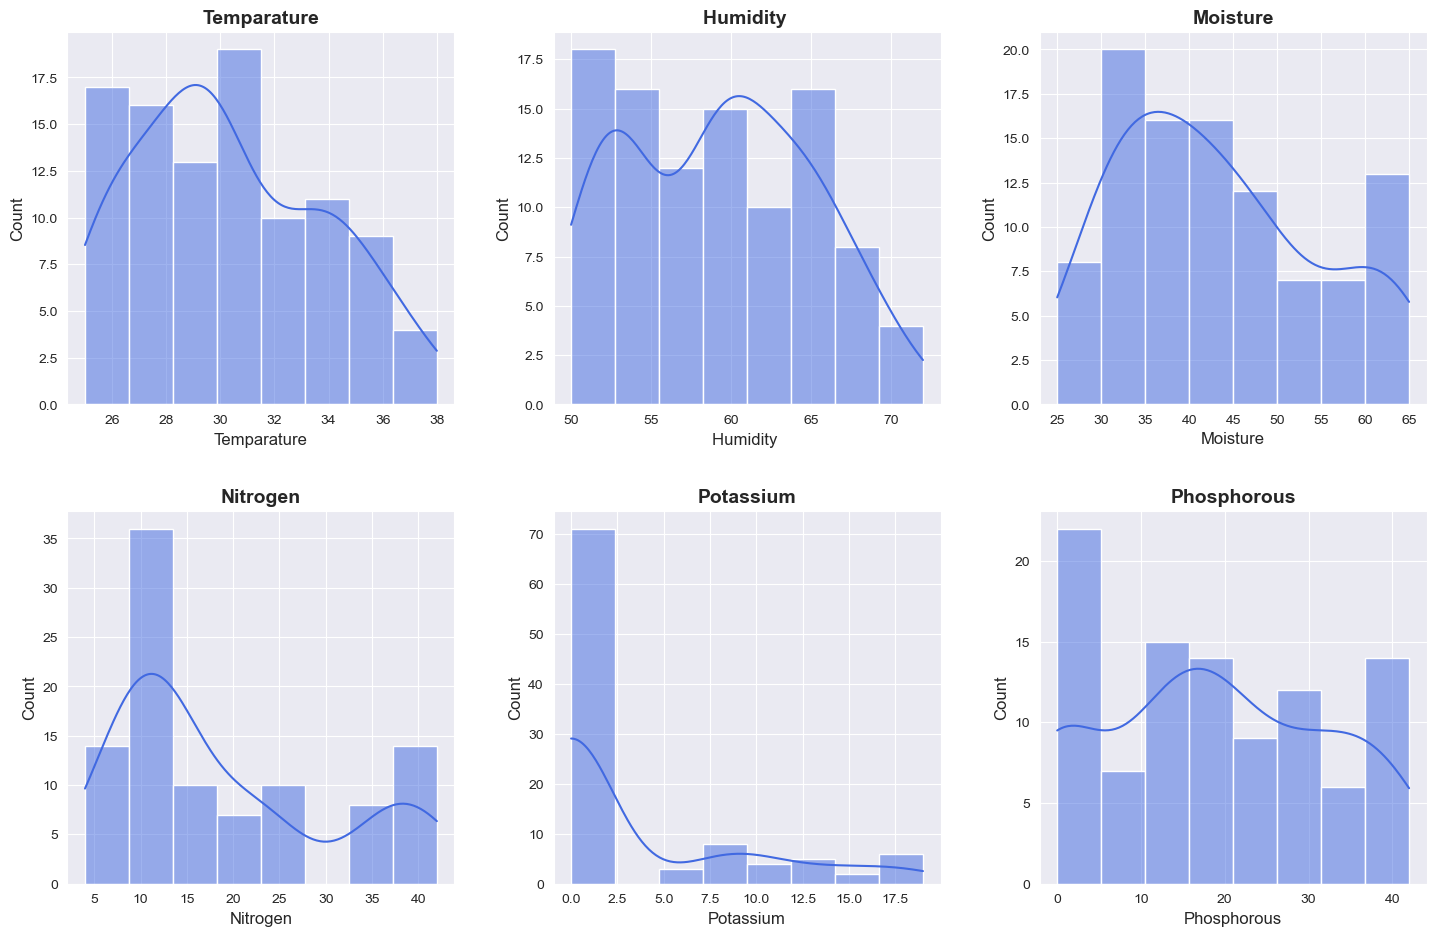

In [14]:
# Visualizing the distribution of each feature:

# Set a clean style:
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Create figure and subplots:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms:
for feature, ax in zip(features, axes.flat):
    sns.histplot(data=fertilizer[feature], ax=ax, kde=True, color="royalblue")
    ax.set_title(feature, fontsize=14, fontweight="bold")
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

# Adjust layout:
plt.tight_layout(pad=3)
plt.show()


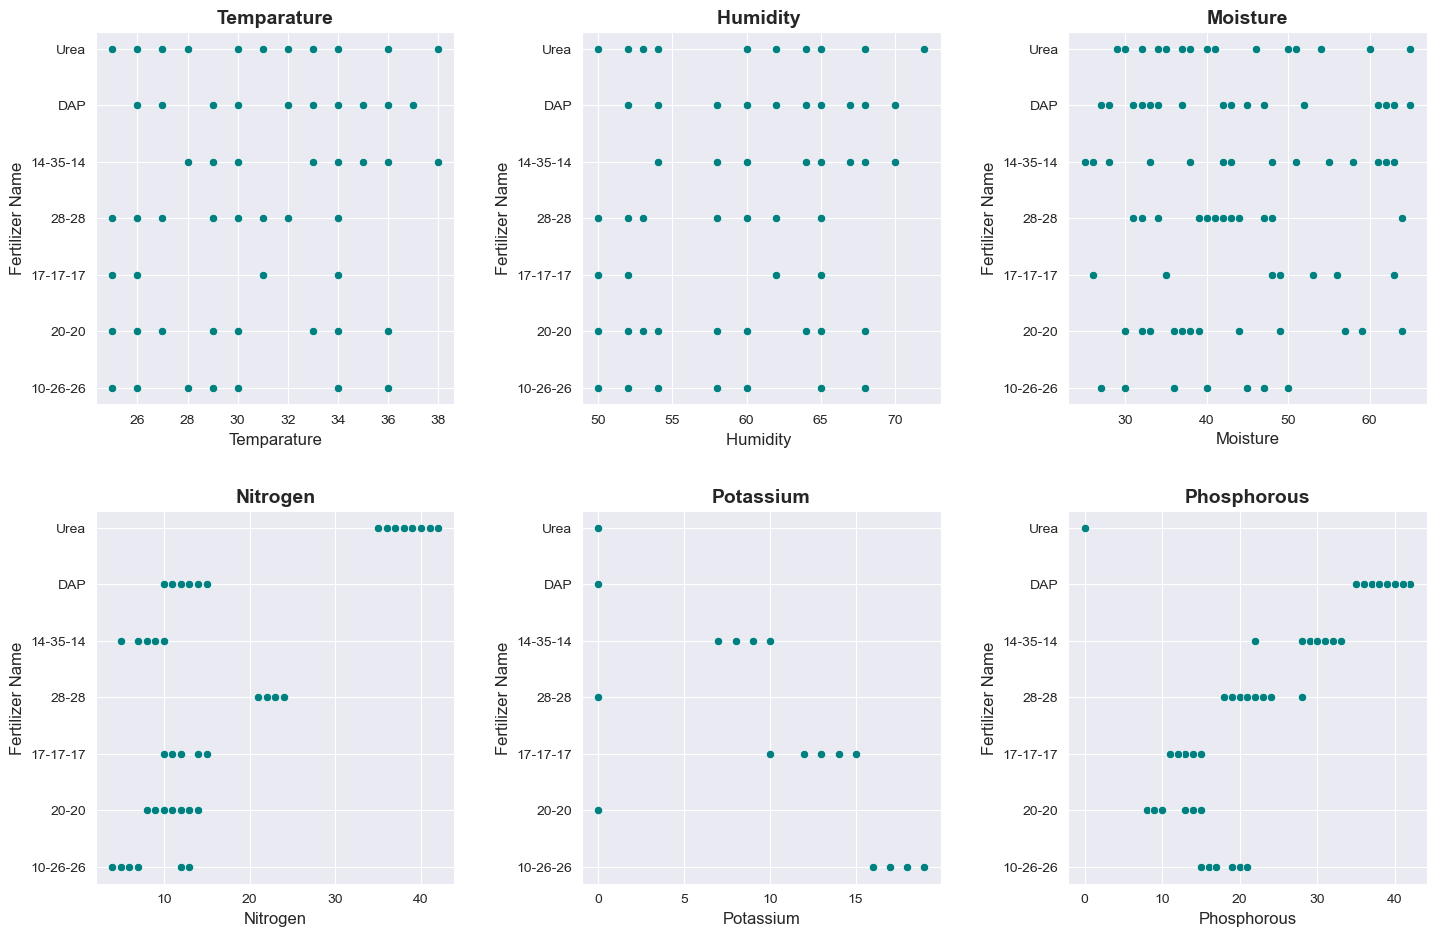

In [15]:
# Plot scatter plot of each feature against the target:

sns.set_style("darkgrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for feature, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=feature, y='Fertilizer Name', data=fertilizer, ax=subplot, color="teal")
    subplot.set_title(feature, fontsize=14, fontweight="bold")
    subplot.set_xlabel(feature, fontsize=12)
    subplot.set_ylabel("Fertilizer Name", fontsize=12)

# Adjust layout for better spacing:
plt.tight_layout(pad=3)
plt.show()


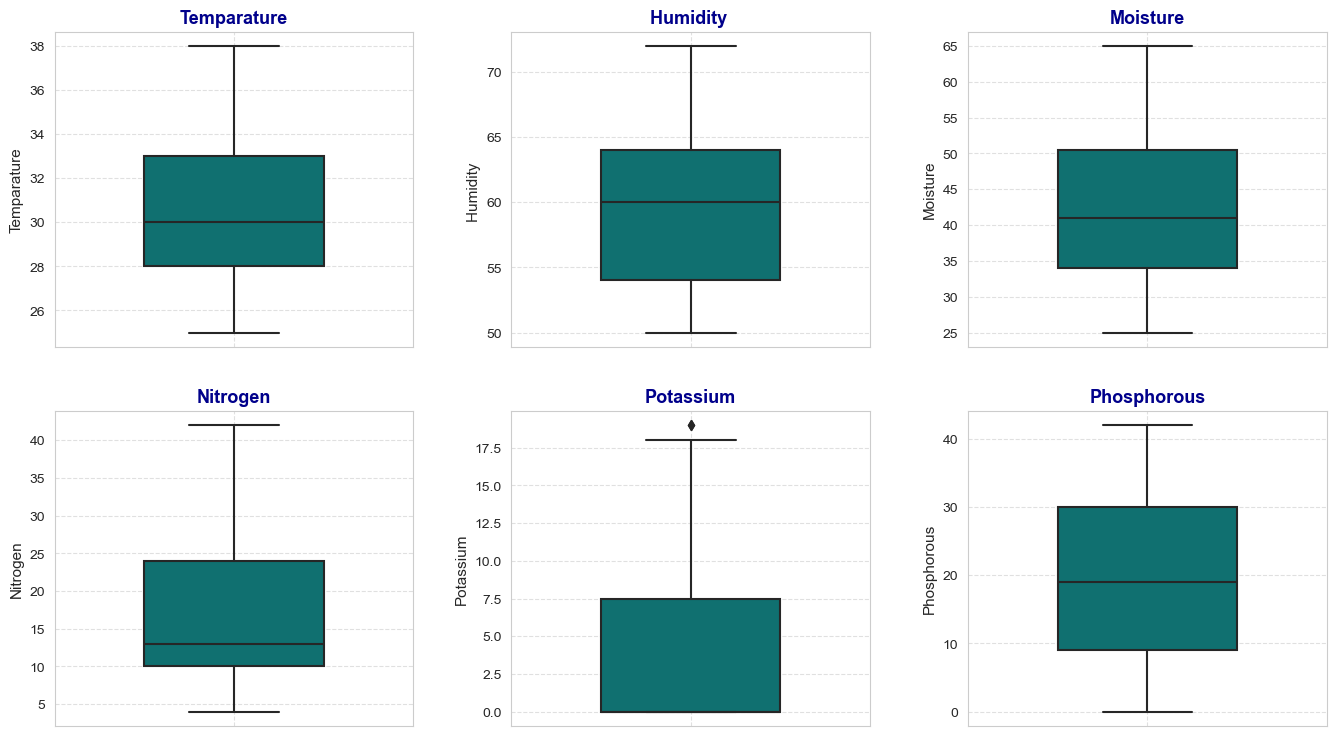

In [16]:
# Creating boxplots for numerical columns to identify the outliers (if any):

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Loop through numerical columns and plot:
for ax, col in zip(axes.flatten(), features):
    sns.boxplot(y=fertilizer[col], ax=ax, color="teal", width=0.5, boxprops={'linewidth': 1.5})
    ax.set_title(col, fontsize=13, fontweight="bold", color="darkblue")
    ax.set_ylabel(col, fontsize=11)
    ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout for better spacing:
plt.tight_layout(pad=3)
plt.show()


#### --> Encoding the target column:

In [18]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [19]:
# Replacing each fertilizer name with its corresponding number from fert_dict:

fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [20]:
fertilizer['fert_no'].value_counts()

fert_no
1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: count, dtype: int64

In [21]:
# Drop the target column with name and keep the target column with numbers:

fertilizer.drop('Fertilizer Name',axis=1, inplace = True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [22]:
# Select the object columns:

fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [23]:
# Convert the categorical columns to numerical columns using labelencoder:

soil_encoder = LabelEncoder()
crop_encoder = LabelEncoder()

# Fit and transform each column with its own encoder
fertilizer["Soil Type"] = soil_encoder.fit_transform(fertilizer['Soil Type'])
fertilizer["Crop Type"] = crop_encoder.fit_transform(fertilizer['Crop Type'])

In [24]:
# Dataset after encoding:

fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


#### --> Splitting:


In [26]:
# Split the dataset into features and target:

x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [27]:
# Split the dataset into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


#### --> Scaling:

In [29]:
# Scale the features using StandardScaler:

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Training Models:

In [31]:
# Insialize the DecisionTreeClassifier:

model = DecisionTreeClassifier()

In [32]:
# Train the model:

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
# Evaluate the model on the test set and print the accuracy:

accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [34]:
# Evaluate the model on the training set and print the accuracy:

accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


### Predictive System:

In [36]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]
    
    return f"{fertilizer} is a best fertilizer for the given conditions"

In [37]:
# Given input values:

Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6
    
# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"

In [72]:
import pickle

with open("fertilizer_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("soil_encoder.pkl", "wb") as f:
    pickle.dump(soil_encoder, f)

with open("crop_encoder.pkl", "wb") as f:
    pickle.dump(crop_encoder, f)

with open("fertilizer_scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

In [2]:
# Required numpy and sklearn version for this project:

import numpy as np
import sklearn

print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.26.4
Scikit-learn version: 1.6.1
